* Arquivo onde relizo testes nos codigos que estou implementeando antes de efetivamente colocar eles no codec.
* Muitos codigos aqui podem estar sem comentarios e dificeis de entender, é um arquivo apenas de test.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import heapq
from collections import Counter
import codec

In [2]:
QTY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],  # Tabela de qunatização da luminancia
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

QTC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],  # Tabela de quantização das chorminancias
                [18, 21, 26, 66, 99, 99, 99, 99],
                [24, 26, 56, 99, 99, 99, 99, 99],
                [47, 66, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99]])

In [3]:
# abrindo a imagem, para mudar a imagem basta alterar o caminho da imagem
img = Image.open('imgs/lena.bmp')
# convertendo para o espaço de cor YCrCb
colorSpace = codec.toYCrCb(img)
# constantes de sub amostragem vertical e horizontal, não representão literalmente o 4:a:b
# quanto maior o valor mais informação descartada e pior o resultado final
# os valores equivalentes para 4:2:2 são ssv = 2, ssh = 1 e para 4:2:0 são ssv = 2 e ssh = 2
ssv, ssh = 2, 3
# fator de qualidade aplicado nas tabelas de quantização, quanto maior mais qualidade e quanto menor mais compressão
# recomendo usar valores de 1 ate no maximo 100 (em 100 praticamente ja não a perdas)
factor = 1
qty = np.round(QTY / factor)
qty[qty == 0] = 1
qtc = np.round(QTC / factor)
qtc[qtc == 0] = 1
# realizando operação de sub amostragem
y, crSub, cbSub, alpha = codec.subSampling(ssv,ssh,colorSpace)
print('comprimindo')
# comprimindo a imagem realizando diretamente a DCT, quantização e codificação em ZIG ZAG, retorna a string codificada
encoded = codec.compress(y, crSub, cbSub, alpha, qty, qtc, ssv, ssh)
codec.writeFile(encoded)
encoded = codec.readFile('compressed.gpeg')
print('descomprimindo')
# descomprimindo realizando os processos inversos da execução anterior 
y, cr, cb, alpha, ssv, ssh = codec.deCompress(encoded)
# reconstruindo os canais que foram aplicados sub amostragem
decodedYCrCb = codec.upSampling(y, cr, cb, alpha, ssv, ssh)
# voltando a imagem para o espaço de cor RGB com canal alpha
decoded = codec.toRGB(decodedYCrCb)
# convertendo o tipo dos dados na imagem para exibição
colorSpace = colorSpace.astype(np.uint8)
# salvando a imagem apenas para vizualização mais detalhada
Image.fromarray(decoded).save('compressed.png')


comprimindo
Tamanho em bits da imagem original: 8388608 bits
Tamanho do codigo da imagem apos compressão: 306567 bits
Taxa de compressão estimada: 96.35%
descomprimindo


In [5]:
# Testando chamada simplificada
codec.encode('imgs/Lena.bmp', ssv=2, ssh=3, factor=1)

img = codec.decode(savePng=True)

plt.imshow(img)

Inciando compressão!
Tamanho em bits da imagem original: 8388608 bits
Tamanho do codigo da imagem apos compressão: 306824 bits
Taxa de compressão estimada: 96.34%
Compressão finalizada!
Iniciando descompressão!
2 3


IndexError: index 512 is out of bounds for axis 1 with size 512

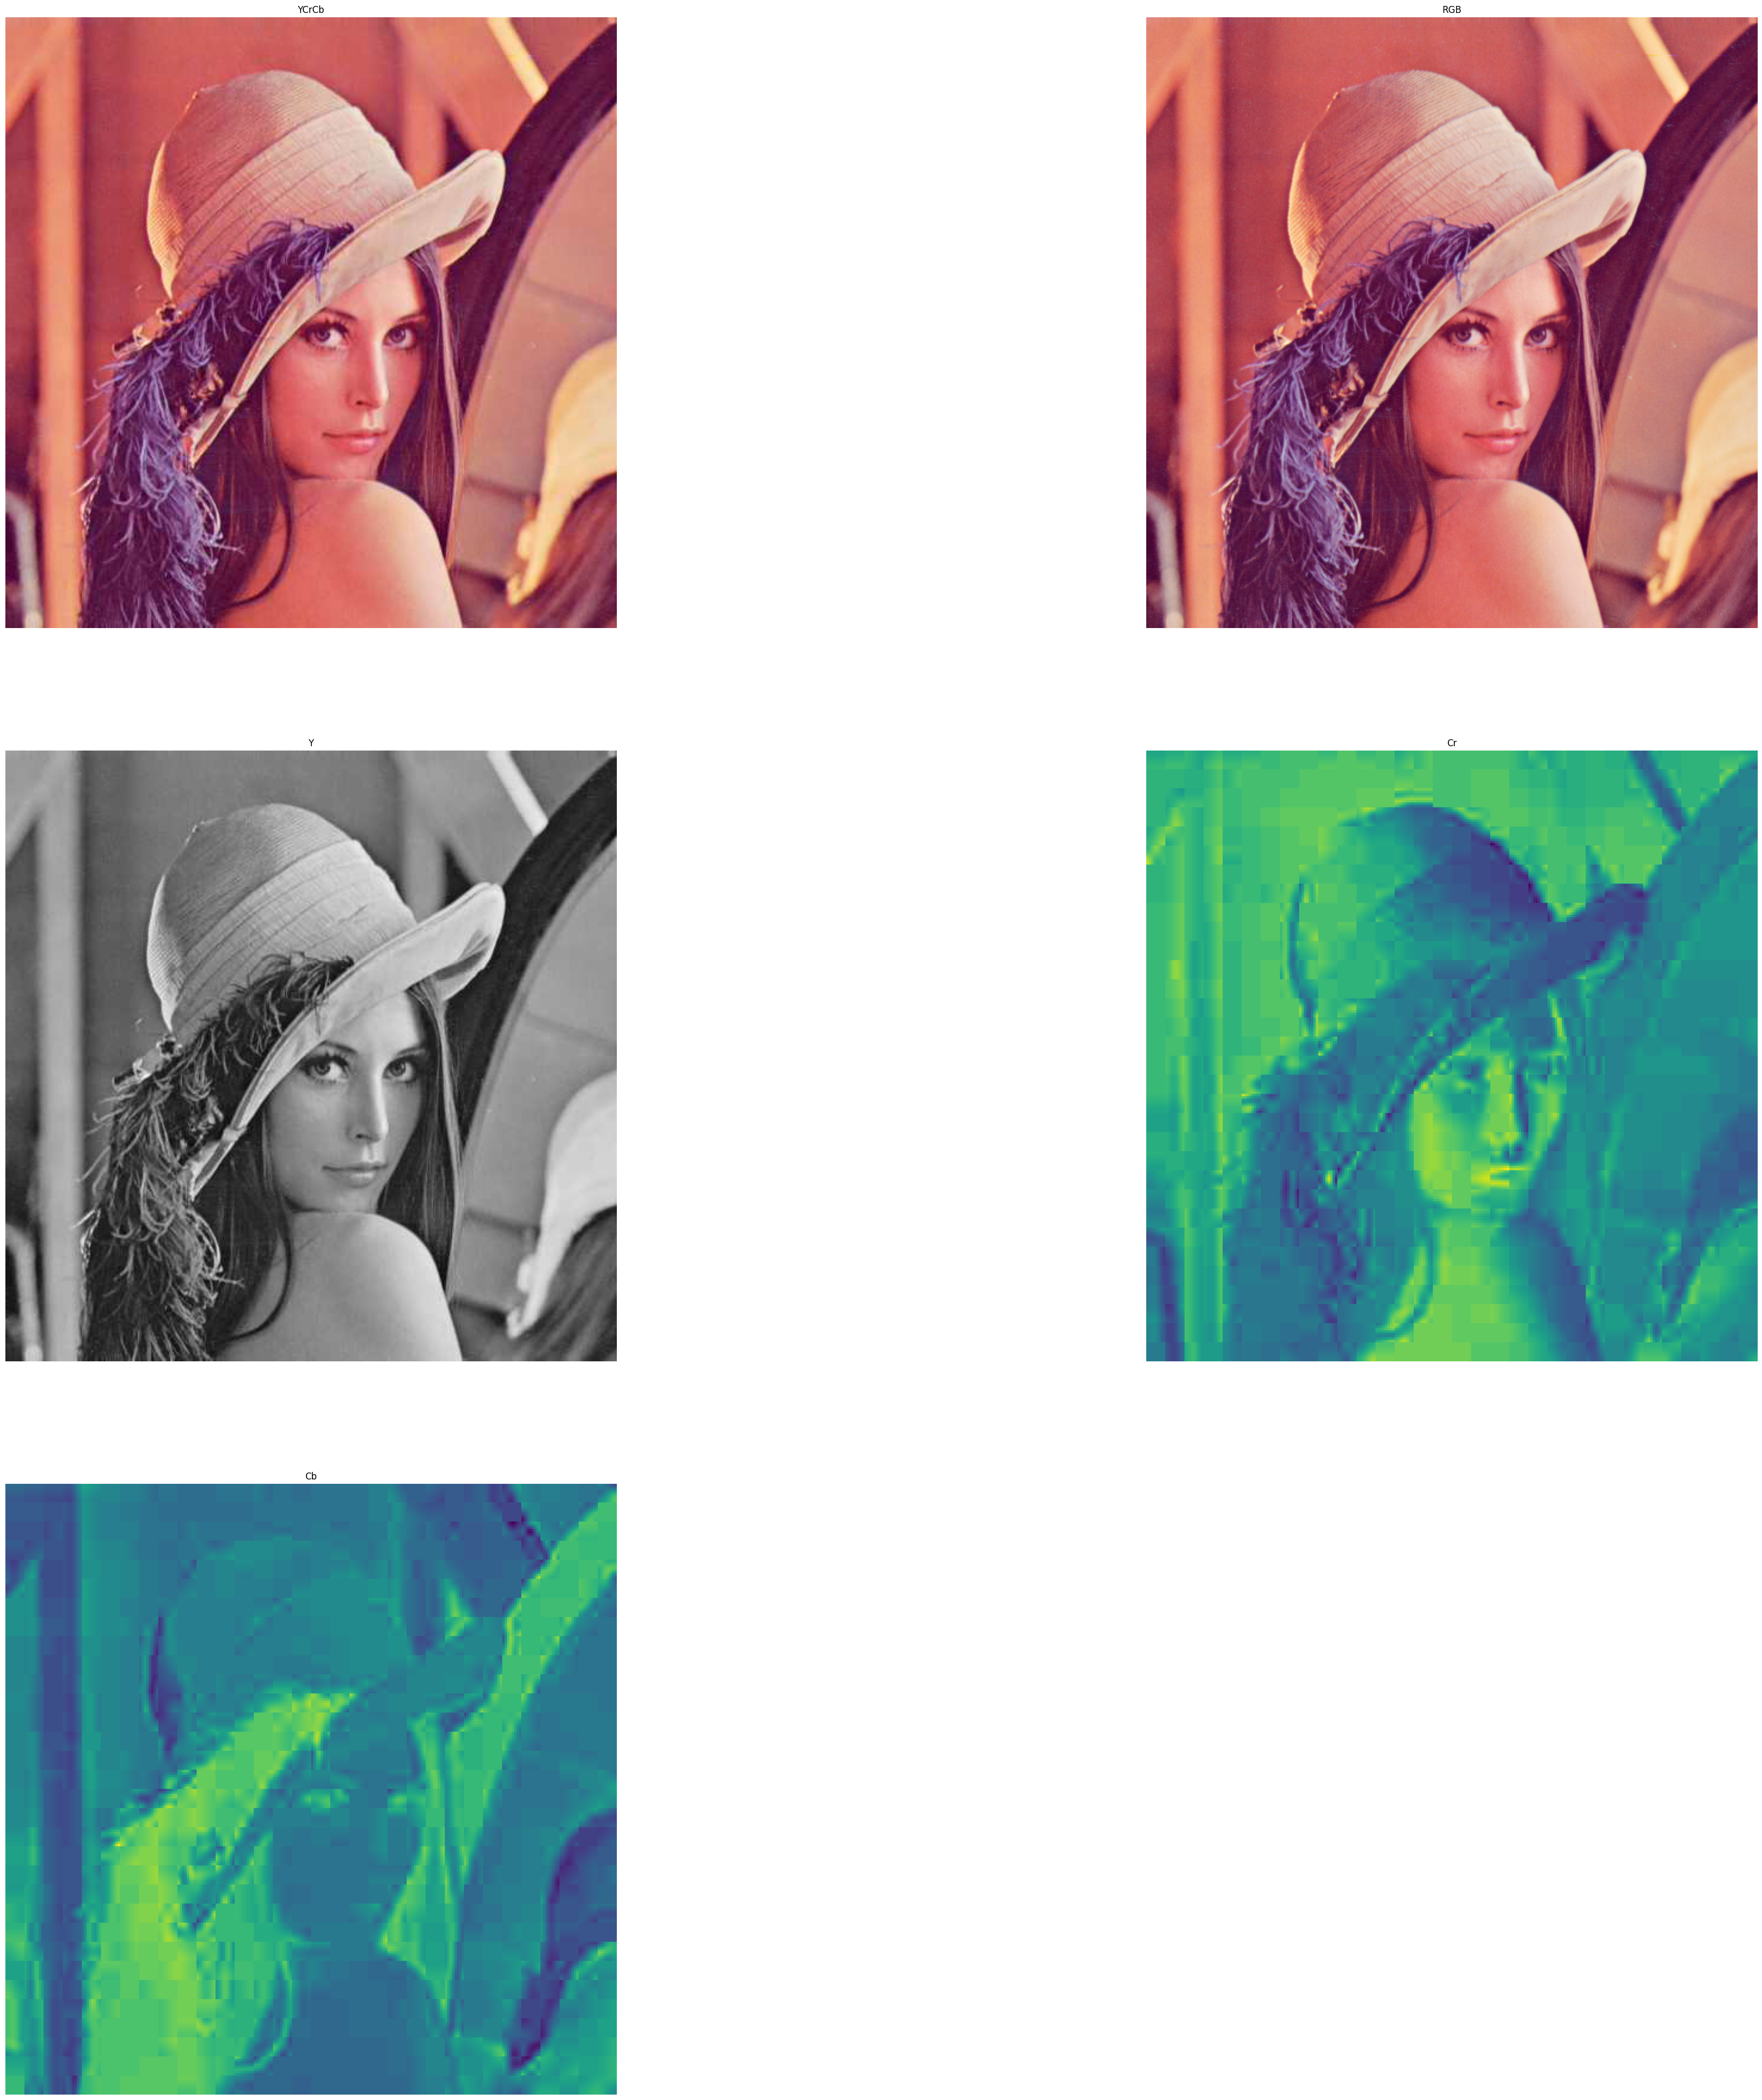

In [5]:

plt.figure(figsize=(50,50))

plt.subplot(3,2,1)
plt.title('YCrCb')
plt.axis('off')
plt.imshow(decoded)

plt.subplot(3,2,2)
plt.title('RGB')
plt.axis('off')
plt.imshow(img)

plt.subplot(3,2,3)
plt.title('Y')
plt.axis('off')
plt.imshow(decodedYCrCb[:,:,0], cmap='gray')

plt.subplot(3,2,4)
plt.title('Cr')
plt.axis('off')
plt.imshow(decodedYCrCb[:,:,1])

plt.subplot(3,2,5)
plt.title('Cb')
plt.axis('off')
plt.imshow(decodedYCrCb[:,:,2])

In [ ]:
#array = np.array([[1,2,3],[4,5,6],[7,8,9]])
array = np.random.randint(1,10,size=(10,7))
print(array)
print()
BLOCKSIZE = 8
if array.shape[1] % BLOCKSIZE == 0 and array.shape[0] % BLOCKSIZE == 0:
        yPadding = array.copy()
        print('igual')
else:
    print('Ajustado')
    yWidth, yHeight = int(np.ceil(array.shape[1] / BLOCKSIZE) * BLOCKSIZE), int(np.ceil(array.shape[0] / BLOCKSIZE) * BLOCKSIZE)
    yPadding = np.zeros((yHeight,yWidth))
    yPadding[0:array.shape[0],0:array.shape[1]] += array
print(yPadding)
print()
ssv, ssh = 1, 1
a = array[::ssv,::ssh].copy()
print(a)

result = np.zeros(array.shape)

for i in range(0, a.shape[0], 1):
    for j in range(0, a.shape[1], 1):
        result[i*ssv,j*ssh] = a[i,j]
        if (j*ssh)+1 < result.shape[1]:
            for x in range(1,ssh):
                result[i*ssv,(j*ssh)+x] = a[i,j]
    if (i*ssv)+1 < result.shape[0]:
        for y in range(1,ssv):
            result[(i*ssv)+y] = result[i*ssv]
        
print()

shape1 = (1920, 1080)
shape2 = (3840, 2160)
aaa = [(3840, 2160),(1920, 1080)]
print(aaa[0])
if aaa[0] < aaa[1]:
     print('sim')
else:
     print('não')
#decoded = decoded
#print(len(decoded[decoded[:,:,2] < 0,2]))
'''img = cv2.boxFilter(np.array(img), ddepth=-1, ksize=(2, 2))
Image.fromarray(img).save('test.png')
Image.fromarray(arr).save('resized2.png')
plt.imshow(img)'''

#plt.imshow(np.array(Image.open('recorte.png'))[70:130,120:230,:])

#Image.fromarray(np.array(Image.open('recorte.png'))[70:130,120:230,:]).save('recorte3.png')


Testes relacionados a compressão usando DCT e quantização

In [ ]:
np.random.seed(9)

#array = np.random.randint(0,255,size=(8,8,3))
array = np.array(Image.open('Arara-Azul.jpg'))
y, cr, cb = array[:,:,0].astype(np.float32), array[:,:,1].astype(np.float32), array[:,:,2].astype(np.float32)
print(y)
y = (y - 128) / 128
cr = (cr - 128) / 128
cb = (cb - 128) / 128
deslocado = np.zeros(array.shape,dtype=np.float32)
deslocado[:,:,0] = y
deslocado[:,:,1] = cr
deslocado[:,:,2] = cb
colors = codec.toYCrCb(deslocado)
y, cr, cb = colors[:,:,0], colors[:,:,1], colors[:,:,2]
BLOCKSIZE = 8

originalShapes = [y.shape,cr.shape,cb.shape]

# verifica se o tamanho de y pode ser dividido igualmente em blocos de 8 por 8 pixel, caso não seja ajusta o shape de y adicionando linhas e colunas de 0
yWidth, yHeight = int(np.ceil(y.shape[1] / BLOCKSIZE) * BLOCKSIZE), int(np.ceil(y.shape[0] / BLOCKSIZE) * BLOCKSIZE)
if y.shape[1] % BLOCKSIZE == 0 and y.shape[0] % BLOCKSIZE == 0:
    print('Sem padding no y')
    yPadding = y.copy()
else:
    print('padding no y')
    yPadding = np.zeros((yHeight,yWidth))
    yPadding[0:y.shape[0],0:y.shape[1]] += y

crWidth, crHeight = int(np.ceil(cr.shape[1] / BLOCKSIZE) * BLOCKSIZE), int(np.ceil(cr.shape[0] / BLOCKSIZE) * BLOCKSIZE)
# como os canais Cr e Cb tem sempre o mesmo tamanho os dois são ajustados dentro do mesmo if
if cr.shape[1] % BLOCKSIZE == 0 and cr.shape[0] % BLOCKSIZE == 0:
    print('sem padding nas chrominancias')
    crPadding = cr.copy()
    cbPadding = cb.copy()
else:
    print('padding nas chrominancias')
    crPadding = np.zeros((crHeight,crWidth))
    cbPadding = np.zeros((crHeight,crWidth))
    crPadding[0:cr.shape[0],0:cr.shape[1]] += cr
    cbPadding[0:cb.shape[0],0:cb.shape[1]] += cb

# definindo quantidade de blocos na horizontal e vertical para luminancia e chrominancia
jBlocksY = int(yPadding.shape[1] / BLOCKSIZE) # quantidade de blocos na horizontal para Y
iBlocksY = int(yPadding.shape[0] / BLOCKSIZE) # quantidade de blocos na vertical para Y
# novamente como os canais cr e cb tem sempre as mesmas dimensões so é necessario definir quantidade de blocos para um deles
jBlocksC = int(crPadding.shape[1] / BLOCKSIZE) # quantidade de blocos na horizontal para Chrominancias
iBlocksC = int(crPadding.shape[0] / BLOCKSIZE) # quantidade de blocos na vertical para Chrominancias

yDct, crDct, cbDct = np.zeros((yHeight, yWidth)), np.zeros((crHeight, crWidth)), np.zeros((crHeight, crWidth))

yQauntized, crQuantized, cbQuantized = np.zeros((yHeight, yWidth)), np.zeros((crHeight, crWidth)), np.zeros((crHeight, crWidth))


# calculando as transformadas e as arrays ja quantizadas de Y
for i in range(iBlocksY):
    for j in range(jBlocksY):
        yDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.dct(yPadding[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        yQauntized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = yDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] / QTY
        

# calculando as transformadas e as arrays ja quantizadas de Chrominancia
for i in range(iBlocksC):
    for j in range(jBlocksC):
        crDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.dct(crPadding[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        cbDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.dct(cbPadding[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        crQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = crDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  / QTC
        
        cbQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cbDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  / QTC
        
######## DESFAZENDO A COMPRESSÃO
yIDct, crIDct, cbIDct = np.zeros((yHeight, yWidth)), np.zeros((crHeight, crWidth)), np.zeros((crHeight, crWidth))

yDeQauntized, crDeQuantized, cbDeQuantized = np.zeros((yHeight, yWidth)), np.zeros((crHeight, crWidth)), np.zeros((crHeight, crWidth))

# calculando as transformadas e as arrays ja quantizadas de Y
for i in range(iBlocksY):
    for j in range(jBlocksY):
        yDeQauntized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            yQauntized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  * QTY
        )
        yIDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.idct(yDeQauntized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])

# calculando as transformadas e as arrays ja quantizadas de Chrominancia
for i in range(iBlocksC):
    for j in range(jBlocksC):
        crDeQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            crQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  * QTC
        )
        cbDeQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            cbQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  * QTC
        )
        crIDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.idct(crDeQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        cbIDct[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.idct(cbDeQuantized[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])

shape = originalShapes[0]
if yIDct.shape > shape:
    yIDct = yIDct[0:shape[0],0:shape[1]]

shape = originalShapes[1]
if crIDct.shape > shape:
    crIDct = crIDct[0:shape[0],0:shape[1]]
    cbIDct = cbIDct[0:shape[0],0:shape[1]]

decompressed = np.zeros((originalShapes[0][0],originalShapes[0][1],3))
#decompressed[:,:,0] = cv2.boxFilter(yIDct, ddepth=-1, ksize=(3, 3))
#decompressed[:,:,1] = cv2.boxFilter(crIDct, ddepth=-1, ksize=(3, 3))
#decompressed[:,:,2] = cv2.boxFilter(cbIDct, ddepth=-1, ksize=(3, 3))

decompressed[:,:,0] = yIDct
decompressed[:,:,1] = crIDct
decompressed[:,:,2] = cbIDct
 
decompressed = codec.toRGB(decompressed)
decompressed[:,:,0] = (decompressed[:,:,0] * 128) + 128
decompressed[:,:,1] = (decompressed[:,:,1] * 128) + 128
decompressed[:,:,2] = (decompressed[:,:,2] * 128) + 128
print(decompressed[:,:,0])

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
plt.subplot(7,3,1)
plt.title('y Original')
plt.imshow(y)

plt.subplot(7,3,2)
plt.title('y DCT')
plt.imshow(yDct)

plt.subplot(7,3,3)
plt.title('y Quantizado')
plt.imshow(yQauntized)

plt.subplot(7,3,4)
plt.title('y IDCT')
plt.imshow(yIDct)

plt.subplot(7,3,5)
plt.title('y DeQuantizado')
plt.imshow(yDeQauntized)

plt.subplot(7,3,6)
plt.title('y Quantizado')
plt.imshow(yQauntized)

plt.subplot(7,3,7)
plt.title('cr Original')
plt.imshow(cr)

plt.subplot(7,3,8)
plt.title('cr DCT')
plt.imshow(crDct)

plt.subplot(7,3,9)
plt.title('cr Quantizado')
plt.imshow(crQuantized)

plt.subplot(7,3,10)
plt.title('cr IDCT')
plt.imshow(crIDct)

plt.subplot(7,3,11)
plt.title('cr DeQuantizado')
plt.imshow(crDeQuantized)

plt.subplot(7,3,12)
plt.title('cr Quantizado')
plt.imshow(crQuantized)

plt.subplot(7,3,13)
plt.title('cb Original')
plt.imshow(cb)

plt.subplot(7,3,14)
plt.title('cb DCT')
plt.imshow(cbDct)

plt.subplot(7,3,15)
plt.title('cb Quantizado')
plt.imshow(cbQuantized)

plt.subplot(7,3,16)
plt.title('cb IDCT')
plt.imshow(cbIDct)

plt.subplot(7,3,17)
plt.title('cb DeQuantizado')
plt.imshow(cbDeQuantized)

plt.subplot(7,3,18)
plt.title('cb Quantizado')
plt.imshow(cbQuantized)

plt.subplot(7,3,19)
plt.title('imagem original')
plt.imshow(array)

plt.subplot(7,3,20)
plt.title('imagem descomprimida')
plt.imshow(decompressed)




In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('imagem original')
plt.imshow(array)

plt.subplot(1,2,2)
plt.title('imagem descomprimida')
plt.imshow(decompressed)

Image.fromarray(decompressed).save('compressed.png')

In [ ]:
array = np.array(Image.open('Arara-Azul.jpg'))
#Image.fromarray(array).save('Arara-Azul.bmp')
colors = codec.toYCrCb(array)
#colors = colors - 128
#y, cr, cb, alpha = colors[:,:,0], colors[:,:,1], colors[:,:,2], np.full(shape=colors[:,:,0].shape, fill_value=255)
y, cr, cb, alpha = codec.subSampling(2, 2, colors)

yDct, crDct, cbDct, yQauntized, crQuantized, cbQuantized, alpha, originalShapes = codec.quantize(y, cr, cb, alpha, QTY, QTC / 10)
yIDCT, crIDCT, cbIDCT, alpha = codec.deQuantize(yQauntized, crQuantized, cbQuantized, alpha, originalShapes, QTY, QTC / 10)
#yIDCT, crIDCT, cbIDCT = yIDCT + 128, crIDCT + 128, cbIDCT + 128
decompressed = codec.upSampling(yIDCT, crIDCT, cbIDCT, alpha, 2, 2)
#decompressed = np.zeros((originalShapes[0][0],originalShapes[0][1],4))
#decompressed[:,:,0] = cv2.boxFilter(yIDCT, ddepth=-1, ksize=(2, 2))
#decompressed[:,:,1] = cv2.boxFilter(crIDCT, ddepth=-1, ksize=(2, 2))
#decompressed[:,:,2] = cv2.boxFilter(cbIDCT, ddepth=-1, ksize=(2, 2))
#decompressed[:,:,3] = alpha

decompressed[:,:,0] = cv2.boxFilter(decompressed[:,:,0], ddepth=-1, ksize=(2, 2))
decompressed[:,:,1] = cv2.boxFilter(decompressed[:,:,1], ddepth=-1, ksize=(2, 2))
decompressed[:,:,2] = cv2.boxFilter(decompressed[:,:,2], ddepth=-1, ksize=(2, 2))

decompressed = codec.toRGB(decompressed)
print(f'Memoria alocada para a imagem original: {array.nbytes}')
print(f'Memoria alocada para a imagem comprimida: {yQauntized.astype(np.uint8).nbytes + crQuantized.astype(np.uint8).nbytes + cbQuantized.astype(np.uint8).nbytes}')
print(f'Memoria alocada para a imagem descomprimida: {decompressed.nbytes}')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('imagem original')
plt.imshow(array)

plt.subplot(1,2,2)
plt.title('imagem descomprimida')
plt.imshow(decompressed)

Image.fromarray(decompressed).save('compressed.png')

In [ ]:
np.random.seed(5)
BLOCKSIZE = 8
#array = np.random.randint(0,255,(8,8,3))
array = np.array(Image.open('Arara-Azul-png.png'), dtype=np.float32)
#transform = (array - 128) / 128.0


colors = codec.toYCrCb(array)
transform = colors - 128
CONS = 1
r, g, b = colors[:,:,0], colors[:,:,1], colors[:,:,2]

# definindo quantidade de blocos na horizontal e vertical para luminancia e chrominancia
jBlocksY = int(array.shape[1] / BLOCKSIZE) # quantidade de blocos na horizontal para Y
iBlocksY = int(array.shape[0] / BLOCKSIZE) # quantidade de blocos na vertical para Y
# novamente como os canais cr e cb tem sempre as mesmas dimensões so é necessario definir quantidade de blocos para um deles
jBlocksC = int(array.shape[1] / BLOCKSIZE) # quantidade de blocos na horizontal para Chrominancias
iBlocksC = int(array.shape[0] / BLOCKSIZE) # quantidade de blocos na vertical para Chrominancias
dctR, dctG, dctB = np.zeros(array.shape[:2]), np.zeros(array.shape[:2]), np.zeros(array.shape[:2])
quanticedR, quanticedG, quanticedB = np.zeros(array.shape[:2]), np.zeros(array.shape[:2]), np.zeros(array.shape[:2])
# calculando as transformadas e as arrays ja quantizadas de Y
for i in range(iBlocksY):
    for j in range(jBlocksY):
        dctR[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.dct(r[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        quanticedR[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            dctR[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] / (QTY/CONS)
        )

# calculando as transformadas e as arrays ja quantizadas de Chrominancia
for i in range(iBlocksC):
    for j in range(jBlocksC):
        dctG[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.dct(g[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        dctB[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.dct(b[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        quanticedG[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            dctG[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  / (QTC/CONS)
        )
        quanticedB[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            dctB[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  / (QTC/CONS)
        )

deqR, deqG, deqB = np.zeros(array.shape[:2]), np.zeros(array.shape[:2]), np.zeros(array.shape[:2])
idctR, idctG, idctB = np.zeros(array.shape[:2]), np.zeros(array.shape[:2]), np.zeros(array.shape[:2])
# calculando as transformadas e as arrays ja quantizadas de Y
for i in range(iBlocksY):
    for j in range(jBlocksY):
        deqR[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            quanticedR[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  * (QTY/CONS)
        )
        idctR[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.idct(deqR[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])

# calculando as transformadas e as arrays ja quantizadas de Chrominancia
for i in range(iBlocksC):
    for j in range(jBlocksC):
        deqG[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            quanticedG[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  * (QTC/CONS)
        )
        deqB[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = np.ceil(
            quanticedB[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE]  * (QTC/CONS)
        )
        idctG[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.idct(deqG[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])
        idctB[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE] = cv2.idct(deqB[i * BLOCKSIZE: (i * BLOCKSIZE) + BLOCKSIZE, j * BLOCKSIZE: (j * BLOCKSIZE) + BLOCKSIZE])

orig = np.zeros(array.shape)
orig[:,:,0] = idctR
orig[:,:,1] = idctG
orig[:,:,2] = idctB



#orig = (orig * 128) + 128
orig = orig + 128
orig = codec.toRGB(orig)
orig = orig.astype(np.uint8)

Image.fromarray(orig).save('compressed.png')

print(f'Original: \n{array[:,:,0]}')
print(f'Transform: \n{transform[:,:,0]}')
print(f'DCT: \n{dctR}')
print(f'Quanticed: \n{quanticedR.astype(np.int64)}')
print(f'Deq: \n{deqR}')
print(f'IDCT: \n{idctR}')
print(f'Original: \n{orig[:,:,0]}')

plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(array.astype(np.uint8))

plt.subplot(2,3,2)
plt.title('DCT')
plt.imshow(dctR)

plt.subplot(2,3,3)
plt.title('Quanticed')
plt.imshow(quanticedR)

plt.subplot(2,3,4)
plt.title('Original')
plt.imshow(orig)

plt.subplot(2,3,5)
plt.title('DCT')
plt.imshow(deqR)

plt.subplot(2,3,6)
plt.title('Quanticed')
plt.imshow(quanticedR)

* Criando e testando codigo de varredura em Zig-Zag

In [ ]:
original = np.random.randint(0,10,(3,4))

print(original)
zigzagShape = original.shape
zigzag = np.zeros((original.shape[0] * original.shape[1]))

h, w = original.shape

y, x  = 0, 0

right, left, up, down = True, False, False, False

for i in range(zigzag.shape[0]):
    #print(f'I: {i}')
    #print(f'X: {x}, Y: {y}')
    
    # caso ele va apenas para a direita
    if right == True and left == False and up == False and down == False:
        #print('Direção: para direita')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        zigzag[i] = original[y,x]
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo para direita
        x += 1
        # verifica se o array original ja chegou na ultima linha
        if y+1 >= h:
            # define que o proximo passo sera uma diagonal para cima e para direita
            right, left, up, down = True, False, True, False
        else:
            # define que o proximo passo sera uma diagonal para baixo e para esquerda
            right, left, up, down = False, True, False, True
        continue
    # caso ele va para uma diagonal para baixo e esquerda
    if right == False and left == True and up == False and down == True:
        #print('Direção: para baixo e para esquerda')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        zigzag[i] = original[y,x]
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo na diagonal para baixo e esquerda
        x -= 1
        y += 1
        # verifica se o array original ja chegou na ultima linha
        if y+1 >= h:
            # define que o proximo passo sera para direita
            right, left, up, down = True, False, False, False
        # verifica se o array original ja voltou para a primeira coluna
        elif x-1 < 0:
            # define que o proximo passo sera para baixo
            right, left, up, down = False, False, False, True
        else:
            # define que o proximo passo sera uma diagonal para baixo e para esquerda
            right, left, up, down = False, True, False, True
        continue
    # caso ele va para baixo
    if right == False and left == False and up == False and down == True:
        #print('Direção: para baixo')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        zigzag[i] = original[y,x]
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo para baixo
        y += 1
        # verifica se o array original ja chegou na ultima coluna
        if x+1 >= w:
            # define que o proximo passo sera uma diagonal para baixo e para esquerda
            right, left, up, down = False, True, False, True
        else:
            # define que o proximo passo sera uma diagonal para cima e para direita
            right, left, up, down = True, False, True, False
        continue
    # caso ele va para uma diagonal para cima e direita
    if right == True and left == False and up == True and down == False:
        #print('Direção: para cima e para direita')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        zigzag[i] = original[y,x]
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo na diagonal para cima e para direita
        x += 1
        y -= 1
        # verifica se o array original ja chegou na ultima coluna
        if x+1 >= w: 
            # define que o proximo passo sera para baixo
            right, left, up, down = False, False, False, True
        # verifica se o array original ja voltou para a primeira linha
        elif y-1 < 0:
            # define que o proximo passo sera para direita
            right, left, up, down = True, False, False, False
        else:
            # define que o proximo passo sera uma diagonal para cima e para direita
            right, left, up, down = True, False, True, False
        continue

print(zigzag)
# reconstruindo
orignal = np.zeros(zigzagShape)

h, w = original.shape

y, x  = 0, 0

right, left, up, down = True, False, False, False

for i in range(zigzag.shape[0]):
    #print(f'I: {i}')
    #print(f'X: {x}, Y: {y}')
    
    # caso ele va apenas para a direita
    if right == True and left == False and up == False and down == False:
        #print('Direção: para direita')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        original[y,x] = zigzag[i] 
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo para direita
        x += 1
        # verifica se o array original ja chegou na ultima linha
        if y+1 >= h:
            # define que o proximo passo sera uma diagonal para cima e para direita
            right, left, up, down = True, False, True, False
        else:
            # define que o proximo passo sera uma diagonal para baixo e para esquerda
            right, left, up, down = False, True, False, True
        continue
    # caso ele va para uma diagonal para baixo e esquerda
    if right == False and left == True and up == False and down == True:
        #print('Direção: para baixo e para esquerda')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        original[y,x] = zigzag[i]
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo na diagonal para baixo e esquerda
        x -= 1
        y += 1
        # verifica se o array original ja chegou na ultima linha
        if y+1 >= h:
            # define que o proximo passo sera para direita
            right, left, up, down = True, False, False, False
        # verifica se o array original ja voltou para a primeira coluna
        elif x-1 < 0:
            # define que o proximo passo sera para baixo
            right, left, up, down = False, False, False, True
        else:
            # define que o proximo passo sera uma diagonal para baixo e para esquerda
            right, left, up, down = False, True, False, True
        continue
    # caso ele va para baixo
    if right == False and left == False and up == False and down == True:
        #print('Direção: para baixo')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        original[y,x] = zigzag[i]
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo para baixo
        y += 1
        # verifica se o array original ja chegou na ultima coluna
        if x+1 >= w:
            # define que o proximo passo sera uma diagonal para baixo e para esquerda
            right, left, up, down = False, True, False, True
        else:
            # define que o proximo passo sera uma diagonal para cima e para direita
            right, left, up, down = True, False, True, False
        continue
    # caso ele va para uma diagonal para cima e direita
    if right == True and left == False and up == True and down == False:
        #print('Direção: para cima e para direita')
        # atribui o valor encontrado no passo da diagonal no array zigzag
        original[y,x] = zigzag[i]
        #print(f'ZigZag: {zigzag[i]}')
        # efetua o passo na diagonal para cima e para direita
        x += 1
        y -= 1
        # verifica se o array original ja chegou na ultima coluna
        if x+1 >= w: 
            # define que o proximo passo sera para baixo
            right, left, up, down = False, False, False, True
        # verifica se o array original ja voltou para a primeira linha
        elif y-1 < 0:
            # define que o proximo passo sera para direita
            right, left, up, down = True, False, False, False
        else:
            # define que o proximo passo sera uma diagonal para cima e para direita
            right, left, up, down = True, False, True, False
        continue

print(original)



* Testando Algoritmo de RLE (Run Lenght Encoding)

In [ ]:
arr = np.array([2,4,4,4,6,6,6,6,6,9,6,6])
#string = 'www.google.com'
encoded = np.array([])
# salva o tamanho da string 
codeLength = len(arr)
# cria um iterator iniciado em 0
i = 0
# percorre o vetor encontrando repetições e codificando
while i < codeLength:
    # contador de ocorrencias do valor em i
    count = 1
    # continua percorrendo a frente do caracter atual buscando repetições
    while i < codeLength - 1 and arr[i] == arr[i + 1]:
        count += 1
        i += 1
    i += 1

    # salvando a sequencia encontrada
    #encoded += arr[i - 1] + str(count)
    encoded = np.append(encoded, [arr[i - 1], count])

print(f'encoded: {encoded}')

#### DECODIFICANDO

decoded = np.array([])

for i in range(0,len(encoded),2):
    char = encoded[i]
    count = int(encoded[i+1])
    for j in range(count):
        #decoded += char
        decoded = np.append(decoded, char)

print(decoded)
    

* huffman tests (usando memoria do codigo anterior)

In [ ]:
class Node:
    def __init__(self, symbol=None, frequency=None):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None
    
    def __lt__(self, other):
        return self.frequency < other.frequency
    
def buildHuffmanTree(chars, freq):
    # criando uma lista de prioridades
    priority = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority)

    # construindo arvore de huffman
    while len(priority) > 1:
        left_child = heapq.heappop(priority)
        right_child = heapq.heappop(priority)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority, merged_node)
    
    return priority[0]

def generateHuffmanCodes(node:Node, code='', huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[int(node.symbol)] = code
        generateHuffmanCodes(node.left, code + '0', huffman_codes)
        generateHuffmanCodes(node.right, code + '1', huffman_codes)
    
    return huffman_codes

chars = np.unique(encoded[0::2])
frequency = []

for char in chars:
    frequency.append(len(encoded[(encoded == char)]))

print(f'encoded: {encoded}')
print(f'decoded: {decoded}')
print(chars)
print(frequency)

root = buildHuffmanTree(chars,frequency)

codes = generateHuffmanCodes(root)

print(codes)



* implementando RLE usado no JPEG
* RLE usado no jpeg não funciona exatamente como o RLE generico que representa o valor literal seguido pela quantidade desse literal
ele é implementado na verdade gerando um par de valores (quantidade de zeros consecuitivos ate encontrar algo diferente de zero e o tamanho em bits do interio que ele encontrou) seguido pelo valor encontrado e no caso do fim do bloco ele insere algum valor que represente esse final por exemplo EOB ou 0x00.
* Exemplo: original = [64,0,0,0,0,0,1,0] encoded = [(0,8),64,(5,1),1,EOB]

In [5]:
# esta função deve receber um vetor unidimensional de inteiros gerado pelo algoritmo zigzag aplicado a um bloco de pixels
def jpegRLEEncode(vector: np.ndarray) -> list:

    # lista responsavel por armazenar a codificação RLE
    encoded = []
    # contador de zeros consecutivos
    zero_count = 0

    for value in vector:
        if value == 0:
            zero_count += 1
        else:
            # Quando encontra um valor não nulo, salva o par (run-length, tamanho do valor)
            # calcula o tamanho em bits necessario para armazenar o valor não nulo encontrado
            #size = int(np.floor(np.log2(abs(value))) + 1)
            size = int(value).bit_length() + 1
            
            #if value < 0:
            #    value = (1 << size) + value # permite um binario negativo

            encoded.append((zero_count, size))
            encoded.append(int(value))
            # Reseta a contagem de zeros
            zero_count = 0
    
    # Adiciona o símbolo EOB (End of Block) se o resto é zero
    #if zero_count > 0:
    encoded.append((0, 0))  # EOB para indicar o fim do bloco

    return encoded

# a lista recebida deve ter o formato [(qtd_zeros,bit_qtd),int]
def jpegRLEDecode(encoded: list) -> np.ndarray:

    # lista responsavel por armazenar o codigo RLE decodificado
    decoded = []

    for i in range(0, len(encoded), 2):
        zeros, size = encoded[i]
        if size == 0 and zeros == 0:
            # EOB encontrado, preenche o restante com zeros
            while len(decoded) < 64:
                decoded.append(0)
            break
        else:
            # Preenche os zeros até o próximo valor
            decoded.extend([0] * zeros)
            # Adiciona o valor real
            value = encoded[i + 1]

            #max_positive = (1 << size) - 1
            #if value > max_positive // 2:
            #    value -= (1 << size)

            decoded.append(value)

    return np.array(decoded, dtype=int)


# Vetor de coeficientes DCT após a varredura em zigue-zague
zigzag_vector = np.array([15, 0, 0, -3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0])
vector = np.array([64, -3, 0, 0, -1, 2, 0, 0])


# Codificação
encoded = jpegRLEEncode(vector)
print("Codificado (RLE JPEG):", encoded)

# Decodificação
decoded = jpegRLEDecode(encoded)
print("Decodificado:", decoded)

Codificado (RLE JPEG): [(0, 8), 64, (0, 3), -3, (2, 2), -1, (0, 3), 2, (0, 0)]
Decodificado: [64 -3  0  0 -1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


* Criando a codificação de huffman no caso do jpeg huffman codifica apenas as tuplas que contem a quantidade de zeros e o tamanho do proximo valor não nulo,
os valores não nulos em si seram codificados em binario e colocados logo apos o codigo da tupla que contem o seu tamanho em bits para que na hora de decodificar
o programa saiba ate onde ele deve ler os bits para decodificar corretamente

In [6]:
class Node:
    def __init__(self, symbol=None, frequency=None):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None
    
    def __lt__(self, other):
        return self.frequency < other.frequency
    
def buildHuffmanTree(chars, freq):
    # criando uma lista de prioridades
    priority = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority)
    print(priority)

    # construindo arvore de huffman
    while len(priority) > 1:
        left_child = heapq.heappop(priority)
        right_child = heapq.heappop(priority)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority, merged_node)
    
    return priority[0]

def generateHuffmanCodes(node:Node, code='', huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[node.symbol] = code
        generateHuffmanCodes(node.left, code + '0', huffman_codes)
        generateHuffmanCodes(node.right, code + '1', huffman_codes)
    
    return huffman_codes


def generateGlobalHuffmanTable(rle_blocks: list):
    # coletando todos os bloccos
    all_symbols = []
    for block in rle_blocks:
        for symbol in block[::2]:
            if isinstance(symbol, tuple):
                #all_symbols.append(f'{symbol[0]}|{symbol[1]}')
                all_symbols.append(str(symbol))

    # contabilizando frequencias e simbolos
    frequencies = Counter(all_symbols)
    #print(f'frequencias: {frequencies}')

    root = buildHuffmanTree(list(frequencies.keys()), list(frequencies.values()))
    huffman_codes = generateHuffmanCodes(root)

    return root, huffman_codes

def huffmanEncode(rle_blocks: list, huffman_codes: dict) -> str:

    code = ''

    for block in rle_blocks:
        for i in range(0, len(block), 2):
            #if isinstance(block[i], tuple):
            symbol = block[i]
            code += f'{huffman_codes[str(symbol)]}'
            if symbol != (0, 0):
                value = block[i + 1]
                if value != 0:
                    if value > 0:
                        code += format(value, f'0{symbol[1]}b')
                    else: 
                        two_complement = (1 << symbol[1]) + value
                        code += format(two_complement, f'0{symbol[1]}b') 


    return code

def invertHuffmanCodes(huffman_codes: dict):
    return {code: symbol for symbol, code in huffman_codes.items()}

def huffmanDecode(code:str, huffman_codes: dict) -> list:
    # invertendo as chaves com os valores do dicionario de huffman
    huffman_inverted = {code: symbol for symbol, code in huffman_codes.items()}
    # indice para percorrer o codigo
    i = 0
    # buffer para leitura de bits no codigo
    buffer = ''
    # listas para reconstruir o codigo RLE original
    decoded = []
    block = []
    while i < len(code):
        buffer += code[i]
        if buffer in huffman_inverted:
            # reconstruindo uma das tuplas do codigo original
            symbol = eval(huffman_inverted[buffer])
            # salvando a tupla no bloco reconstruido
            block.append(symbol)

            # identifica se chegou ao fim do bloco
            if symbol == (0,0):
                decoded.append(block)
                buffer = ''
                block = []
                i += 1 + symbol[1]
                continue

            # recortando os bits do inteiro não nulo com base no tamanho indicado na tupla acima
            num = code[i+1:(i + 1) + symbol[1]]
            #print(f'i:{i}')
            #print(f'symbol:{symbol}')
            #print(f'num:{num}')
            # convertendo de binario para inteiro (considerando complemento de 2 para numeros negativos)
            # caso o numero seja negativo
            if num[0] == '1':
                # quantidade de bits 
                bits = len(num)
                # convertendo para inteiro
                num = int(num, 2)
                # ajustando complemento de 2
                num = num - (1 << bits)
            else:
                # se for positivo apenas converte para inteiro 
                num = int(num, 2)

            # salva o valor não nulo no bloco reconstruido
            block.append(num)
            # limpando buffer de bits
            buffer = ''
            i += 1 + symbol[1]
        else:
            i += 1

    return decoded

vectors = [
    np.array([64, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
    np.array([12, 12, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]),
]

rle_blocks = [jpegRLEEncode(vec) for vec in vectors]
#rle_blocks = [jpegRLEEncode(vectors[0])]
#rle_blocks = [
#    [(0, 6), 64, (5, 1), 1],  # Bloco 1
#    [(0, 5), -31, (1, 4), 15],  # Bloco 2
#]
#rle_blocks = [[(0, 7), 64, (0, 2), -3, (2, 1), -1, (0, 2), 2, (0, 0)]]
print(f'RlE encoded blocks: {rle_blocks}')

root, huffman_codes = generateGlobalHuffmanTable(rle_blocks)

print(f'Huffman codes: {huffman_codes}')
encoded = huffmanEncode(rle_blocks, huffman_codes)
print(f'blocos codificados: {encoded}, tamanho: {len(encoded)}')

decoded = huffmanDecode(encoded, huffman_codes)

print(f'RLE rebuilt: {decoded}')

decodedRLE = np.array([jpegRLEDecode(block) for block in decoded])

print(f'decodedRLE: {decodedRLE}')


RlE encoded blocks: [[(0, 8), 64, (0, 3), -3, (14, 2), 1, (14, 2), 1, (0, 0)], [(0, 5), 12, (0, 5), 12, (2, 4), 7, (11, 4), 5, (14, 3), 3, (0, 0)]]
[<__main__.Node object at 0x0000024B28712AE0>, <__main__.Node object at 0x0000024B2B867710>, <__main__.Node object at 0x0000024B28712840>, <__main__.Node object at 0x0000024B2B83D760>, <__main__.Node object at 0x0000024B28712870>, <__main__.Node object at 0x0000024B2B83D8B0>, <__main__.Node object at 0x0000024B284AEE40>, <__main__.Node object at 0x0000024B084DD190>]
Huffman codes: {'(0, 5)': '00', '(11, 4)': '010', '(2, 4)': '011', '(0, 3)': '100', '(0, 0)': '101', '(0, 8)': '1100', '(14, 3)': '1101', '(14, 2)': '111'}
blocos codificados: 110001000000100101111011110110100011000001100011011101001011101011101, tamanho: 69
RLE rebuilt: [[(0, 8), 64, (0, 3), -3, (14, 2), 1, (14, 2), 1, (0, 0)], [(0, 5), 12, (0, 5), 12, (2, 4), 7, (11, 4), 5, (14, 3), 3, (0, 0)]]
decodedRLE: [[64 -3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 

* testando a codificação do header (informações sobre tamanho original da imagem, tabelas de quantização e tabela de huffman)

In [7]:
qtcVector = codec.zigzagVector(QTC)
qtyVector = codec.zigzagVector(QTY)
vectors.append(qtcVector)
vectors.append(qtyVector)

rle_blocks = [jpegRLEEncode(vec) for vec in vectors]

print(f'RlE encoded blocks: {rle_blocks}')

root, huffman_codes = generateGlobalHuffmanTable(rle_blocks)

print(f'Huffman codes: {huffman_codes}')
encoded = huffmanEncode(rle_blocks, huffman_codes)
print(f'blocos codificados: {encoded}, tamanho: {len(encoded)}')

decoded = huffmanDecode(encoded, huffman_codes)

print(f'RLE rebuilt: {decoded}')

decodedRLE = np.array([jpegRLEDecode(block) for block in decoded])

print(f'decodedRLE: \n{codec.zigzagReconstruct(decodedRLE[2]).astype(np.uint8)}')



RlE encoded blocks: [[(0, 8), 64, (0, 3), -3, (14, 2), 1, (14, 2), 1, (0, 0)], [(0, 5), 12, (0, 5), 12, (2, 4), 7, (11, 4), 5, (14, 3), 3, (0, 0)], [(0, 6), 17, (0, 6), 18, (0, 6), 18, (0, 6), 24, (0, 6), 21, (0, 6), 24, (0, 7), 47, (0, 6), 26, (0, 6), 26, (0, 7), 47, (0, 8), 99, (0, 8), 66, (0, 7), 56, (0, 8), 66, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 0)], [(0, 6), 16, (0, 5), 11, (0, 5), 12, (0, 5), 14, (0, 5), 12, (0, 5), 10, (

In [ ]:
class Node:
    def __init__(self, symbol=None, frequency=None):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None
    
    def __lt__(self, other):
        return self.frequency < other.frequency
    
def buildHuffmanTree(chars, freq):
    # criando uma lista de prioridades
    priority = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority)
    print(priority)

    # construindo arvore de huffman
    while len(priority) > 1:
        left_child = heapq.heappop(priority)
        right_child = heapq.heappop(priority)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority, merged_node)
    
    return priority[0]

def generateHuffmanCodes(node:Node, code='', huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[node.symbol] = code
        generateHuffmanCodes(node.left, code + '0', huffman_codes)
        generateHuffmanCodes(node.right, code + '1', huffman_codes)
    
    return huffman_codes


def generateGlobalHuffmanTable(rle_blocks: list):
    # coletando todos os bloccos
    all_symbols = []
    for block in rle_blocks:
        for symbol in block[::2]:
            if isinstance(symbol, tuple):
                #all_symbols.append(f'{symbol[0]}|{symbol[1]}')
                all_symbols.append(str(symbol))

    # contabilizando frequencias e simbolos
    frequencies = Counter(all_symbols)
    #print(f'frequencias: {frequencies}')

    root = buildHuffmanTree(list(frequencies.keys()), list(frequencies.values()))
    huffman_codes = generateHuffmanCodes(root)

    return root, huffman_codes

def huffmanEncode(rle_blocks: list, huffman_codes: dict) -> str:

    code = ''

    for block in rle_blocks:
        for i in range(0, len(block), 2):
            #if isinstance(block[i], tuple):
            symbol = block[i]
            code += f'{huffman_codes[str(symbol)]}'
            if symbol != (0, 0):
                value = block[i + 1]
                if value != 0:
                    if value > 0:
                        code += format(value, f'0{symbol[1]}b')
                    else: 
                        two_complement = (1 << symbol[1]) + value
                        code += format(two_complement, f'0{symbol[1]}b') 


    return code

def invertHuffmanCodes(huffman_codes: dict):
    return {code: symbol for symbol, code in huffman_codes.items()}

def huffmanDecode(code:str, huffman_codes: dict) -> list:
    # invertendo as chaves com os valores do dicionario de huffman
    huffman_inverted = {code: symbol for symbol, code in huffman_codes.items()}
    # indice para percorrer o codigo
    i = 0
    # buffer para leitura de bits no codigo
    buffer = ''
    # listas para reconstruir o codigo RLE original
    decoded = []
    block = []
    while i < len(code):
        buffer += code[i]
        if buffer in huffman_inverted:
            # reconstruindo uma das tuplas do codigo original
            symbol = eval(huffman_inverted[buffer])
            # salvando a tupla no bloco reconstruido
            block.append(symbol)

            # identifica se chegou ao fim do bloco
            if symbol == (0,0):
                decoded.append(block)
                buffer = ''
                block = []
                i += 1 + symbol[1]
                continue

            # recortando os bits do inteiro não nulo com base no tamanho indicado na tupla acima
            num = code[i+1:(i + 1) + symbol[1]]
            # convertendo de binario para inteiro (considerando complemento de 2 para numeros negativos)
            # caso o numero seja negativo
            if num[0] == '1':
                # quantidade de bits 
                bits = len(num)
                # convertendo para inteiro
                num = int(num, 2)
                # ajustando complemento de 2
                num = num - (1 << bits)
            else:
                # se for positivo apenas converte para inteiro 
                num = int(num, 2)

            # salva o valor não nulo no bloco reconstruido
            block.append(num)
            # limpando buffer de bits
            buffer = ''
            i += 1 + symbol[1]
        else:
            i += 1

    return decoded

In [9]:
def encodeHuffmanTable(huffman_table: dict) -> str:
    encoded = ''
    for symbol, code in huffman_table.items():
        # Converte o símbolo (tupla) em uma string e depois para bytes
        symbol_str = str(symbol)  # Converte a tupla em string
        # Armazena o tamanho do símbolo como binário 
        symbol_length = len(symbol_str)
        symbol_length_binary = format(symbol_length, '016b')
        # Converte cada caractere da string do símbolo para binário (8 bits por caractere)
        symbol_binary = ''.join(format(ord(char), '08b') for char in symbol_str)
        # Armazena o comprimento do código de Huffman em 8 bits
        code_length = len(code)
        code_length_binary = format(code_length, '08b')
        # Concatena símbolo, comprimento do código e o código
        encoded += symbol_length_binary + symbol_binary + code_length_binary + code
    # Adiciona o marcador de fim da seção
    end_marker = "1111111111111111"  # 16 bits de 1
    encoded += end_marker
    return encoded

def decodeHuffmanTable(encoded: str) -> tuple:
    end_marker = "1111111111111111"
    huffman_table = {}
    offset = 0
    while offset < len(encoded):
        # Verifica se encontrou o marcador de fim
        if encoded[offset:offset + 16] == end_marker:
            offset += 16
            break  # Fim da decodificação dos dados
        # Lê o comprimento do símbolo (16 bits)
        symbol_length_binary = encoded[offset:offset + 16]
        symbol_length = int(symbol_length_binary, 2)
        offset += 16
        # Lê o símbolo em formato binário
        symbol_binary = encoded[offset:offset + (symbol_length * 8)]
        symbol_str = ''.join(chr(int(symbol_binary[i:i + 8], 2)) for i in range(0, len(symbol_binary), 8))
        offset += symbol_length * 8
        # Lê o comprimento do código (8 bits)
        code_length_binary = encoded[offset:offset + 8]
        code_length = int(code_length_binary, 2)
        offset += 8
        # Lê o código de Huffman
        code = encoded[offset:offset + code_length]
        offset += code_length
        huffman_table[symbol_str] = code
    return huffman_table, encoded[offset:]

In [12]:

'''qtcVector = codec.zigzagVector(QTC)
qtyVector = codec.zigzagVector(QTY)
vectors.append(qtcVector)
vectors.append(qtyVector)

rle_blocks = [jpegRLEEncode(vec) for vec in vectors]

print(f'RlE encoded blocks: {rle_blocks}')

root, huffman_codes = generateGlobalHuffmanTable(rle_blocks)

print(f'Huffman codes: {huffman_codes}')
encoded = huffmanEncode(rle_blocks, huffman_codes)
print(f'blocos codificados: {encoded}, tamanho: {len(encoded)}')

decoded = huffmanDecode(encoded, huffman_codes)

print(f'RLE rebuilt: {decoded}')

decodedRLE = np.array([jpegRLEDecode(block) for block in decoded])

print(f'decodedRLE: \n{codec.zigzagReconstruct(decodedRLE[2]).astype(np.uint8)}')'''


# Exemplo de uso com uma tabela de Huffman real com tuplas
huffman_table = {
    '(0, 5)': '00', '(11, 4)': '010', '(2, 4)': '011',
    '(0, 3)': '100', '(0, 0)': '101', '(0, 8)': '1100',
    '(14, 3)': '1101', '(14, 2)': '111'
}

# Desserializando para conferir a reconstrução

qtyVector = codec.zigzagVector(QTC)
print(qtyVector)
qtyRLE = [jpegRLEEncode(qtyVector)]
print(qtyRLE)
root, huffman_codes = generateGlobalHuffmanTable(qtyRLE)
print(huffman_codes)
encoded = huffmanEncode(qtyRLE, huffman_codes)
print(len(encoded))
serialized_huffman = encodeHuffmanTable(huffman_codes) + '00000011111101'
print(serialized_huffman)
decoded_huffman, code = decodeHuffmanTable(serialized_huffman)
print(decoded_huffman)
print(code)
decoded = huffmanDecode(encoded, decoded_huffman)
print(decoded)
decoded = np.array(jpegRLEDecode(decoded[0]))
print(decoded)
decoded = codec.zigzagReconstruct(decoded)
print(decoded)




[17. 18. 18. 24. 21. 24. 47. 26. 26. 47. 99. 66. 56. 66. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.]
[[(0, 6), 17, (0, 6), 18, (0, 6), 18, (0, 6), 24, (0, 6), 21, (0, 6), 24, (0, 7), 47, (0, 6), 26, (0, 6), 26, (0, 7), 47, (0, 8), 99, (0, 8), 66, (0, 7), 56, (0, 8), 66, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8

In [13]:
def encodeShapes(shapes: dict) -> str:
    encoded = ''
    for key, value in shapes.items():
        # Serializa a chave do dicionário
        key_length = len(key)
        key_length_binary = format(key_length, '016b')  # 16 bits para o comprimento da chave
        key_binary = ''.join(format(ord(char), '08b') for char in key)  # Cada caractere em 8 bits
        encoded += key_length_binary + key_binary
        
        # Serializa a lista de tuplas
        list_length = len(value)
        list_length_binary = format(list_length, '08b')  # 8 bits para o comprimento da lista
        encoded += list_length_binary
        for tup in value:
            # Cada elemento da tupla (dois inteiros) em 32 bits
            for num in tup:
                encoded += format(num, '032b')  # Inteiros em 32 bits

    # Adiciona o marcador de fim da seção
    end_marker = "1111111111111111"  # 16 bits de 1
    encoded += end_marker
    return encoded

def decodeShapes(encoded: str) -> tuple:
    end_marker = "1111111111111111"
    decoded = {}
    offset = 0
    while offset < len(encoded):
        # Verifica se encontrou o marcador de fim
        if encoded[offset:offset + 16] == end_marker:
            offset += 16
            break  # Fim da decodificação dos dados
        # Lê o comprimento da chave
        key_length_binary = encoded[offset:offset + 16]
        key_length = int(key_length_binary, 2)
        offset += 16
        # Lê a chave
        key_binary = encoded[offset:offset + (key_length * 8)]
        # reconstruindo a chave
        key = ''.join(chr(int(key_binary[i:i + 8], 2)) for i in range(0, len(key_binary), 8))
        offset += key_length * 8
        
        # Lê o comprimento da lista
        list_length_binary = encoded[offset:offset + 8]
        list_length = int(list_length_binary, 2)
        offset += 8
        # Lê os elementos da lista (tuplas)
        value = []
        for _ in range(list_length):
            tup = []
            for _ in range(2):  # Cada tupla tem 2 inteiros
                num_binary = encoded[offset:offset + 32]
                num = int(num_binary, 2)
                tup.append(num)
                offset += 32
            value.append(tuple(tup))
        decoded[key] = value
    return decoded, encoded[offset:]

# Exemplo de uso com a estrutura de dados fornecida
shapes = {
    'original': [(1080, 1920), (540, 1920), (540, 1920), (1080, 1920)],
    'padded': [(1080, 1920), (544, 1920), (544, 1920)]
}

# Serializando a estrutura
encodedShapes = encodeShapes(shapes) + '00000011111101'
print("Serialized Data (binary string):", encodedShapes)

# Desserializando para conferir a reconstrução
decoded_data, code = decodeShapes(encodedShapes)
print("Decoded Data:", decoded_data)
print(code)


Serialized Data (binary string): 00000000000010000110111101110010011010010110011101101001011011100110000101101100000001000000000000000000000001000011100000000000000000000000011110000000000000000000000000000010000111000000000000000000000001111000000000000000000000000000001000011100000000000000000000000111100000000000000000000000000001000011100000000000000000000000011110000000000000000000011001110000011000010110010001100100011001010110010000000011000000000000000000000100001110000000000000000000000001111000000000000000000000000000001000100000000000000000000000000111100000000000000000000000000000100010000000000000000000000000011110000000111111111111111100000011111101
Decoded Data: {'original': [(1080, 1920), (540, 1920), (540, 1920), (1080, 1920)], 'padded': [(1080, 1920), (544, 1920), (544, 1920)]}
00000011111101


In [14]:
# Exemplo de uso com a estrutura de dados fornecida
shapes = {
    'original': [(1080, 1920), (540, 1920), (540, 1920), (1080, 1920)],
    'padded': [(1080, 1920), (544, 1920), (544, 1920)]
}

encoded = ''

# codificando shapes
encoded += encodeShapes(shapes)

# codificando tabela de huffman e bloco QTC
qtyVector = codec.zigzagVector(QTC)
print(qtyVector)
qtyRLE = [jpegRLEEncode(qtyVector)]
print(qtyRLE)
root, huffman_codes = generateGlobalHuffmanTable(qtyRLE)
print(huffman_codes)
encoded += encodeHuffmanTable(huffman_codes)
encoded += huffmanEncode(qtyRLE, huffman_codes)
print(f'Tamando do codigo gerado: {len(encoded)}')
print(encoded)

# decodificando shapes
shapes, encoded = decodeShapes(encoded)
print(shapes)

# decodificando tabela de huffman
huffman_codes, encoded = decodeHuffmanTable(encoded)
print(huffman_codes)

# decodificando bloco QTC
decoded = huffmanDecode(encoded, huffman_codes)
print(decoded)
decoded = np.array(jpegRLEDecode(decoded[0]))
print(decoded)
decoded = codec.zigzagReconstruct(decoded)
print(decoded)




[17. 18. 18. 24. 21. 24. 47. 26. 26. 47. 99. 66. 56. 66. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.]
[[(0, 6), 17, (0, 6), 18, (0, 6), 18, (0, 6), 24, (0, 6), 21, (0, 6), 24, (0, 7), 47, (0, 6), 26, (0, 6), 26, (0, 7), 47, (0, 8), 99, (0, 8), 66, (0, 7), 56, (0, 8), 66, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8), 99, (0, 8